In [1]:
import sys,os
import numpy as np
import matplotlib.pyplot as plt


os.chdir('/reg/neh/home/marcgri/Software/pysingfel/')

import pysingfel as ps
import pysingfel.solvent_form_factor as sff

import time

In [7]:

particles = ps.particle.Particle()
particles.read_pdb('examples/input/SAXS_10atoms_mod.pdb','CM')
lp = particles.get_num_atoms()








ft = sff.form_factor_table.FormFactorTable(None,0.0,3.0,0.01)


vacuum_ff = ft.get_vacuum_form_factors()
dummy_ff = ft.get_dummy_form_factors()

corrected_ff = vacuum_ff - dummy_ff

radius = []

xyz = particles.get_atom_struct()
xyz = np.transpose(xyz)
print xyz.shape

print xyz

symbols = particles.get_atomic_symbol()
e = particles.get_atomic_variant()

residue = particles.get_residue()

for i in range(len(xyz)):
    radius.append(2.0)  # for now
radius = np.asarray(radius)
radius = radius.reshape((lp,1))

radius = np.array(radius)

xyz_plus_radius = np.hstack((xyz,radius))
print xyz_plus_radius


[1.99, 9.126, 10.027, 0, 'N', 'N', 'ALA']
[1.067, 9.654, 8.994, 0, 'C', 'CA', 'ALA']
[1.167, 11.156, 8.783, 0, 'C', 'CB', 'ALA']
[1.155, 11.908, 9.776, 0, 'O', 'O', 'HIS']
[-0.361, 9.267, 9.38, 0, 'C', 'C', 'PHE']
[-1.429, 9.868, 8.467, 0, 'S', 'SG', 'CYS']
[-2.781, 9.259, 8.802, 0, 'O', 'O', 'PHE']
[-3.899, 9.938, 8.018, 0, 'C', 'CG', 'ARG']
[-3.839, 10.005, 7.983, 0, 'C', 'CD', 'ARG']
[-4.034, 9.39, 6.642, 0, 'N', 'N', 'GLU']
(10, 4)
[[  1.99    9.126  10.027   0.   ]
 [  1.067   9.654   8.994   0.   ]
 [  1.167  11.156   8.783   0.   ]
 [  1.155  11.908   9.776   0.   ]
 [ -0.361   9.267   9.38    0.   ]
 [ -1.429   9.868   8.467   0.   ]
 [ -2.781   9.259   8.802   0.   ]
 [ -3.899   9.938   8.018   0.   ]
 [ -3.839  10.005   7.983   0.   ]
 [ -4.034   9.39    6.642   0.   ]]
[[  1.99    9.126  10.027   0.      2.   ]
 [  1.067   9.654   8.994   0.      2.   ]
 [  1.167  11.156   8.783   0.      2.   ]
 [  1.155  11.908   9.776   0.      2.   ]
 [ -0.361   9.267   9.38    0.      2

In [8]:
start = time.time()

s = sff.solvent_accessible_surface.SolventAccessibleSurface()
surface_area,fraction,sas = s.calculate_asa(xyz_plus_radius,1.4,100)
end = time.time()
print 'Calculated %d particle solvent accessibilities in %f seconds.' % (len(xyz_plus_radius),end-start)



Creating solvent accessible surface object
RADIUS= [ 2.8  2.8  2.8  2.8  2.8  2.8  2.8  2.8  2.8  2.8] 

0
Calculated 10 particle solvent accessibilities in 0.018479 seconds.


In [9]:
divisions = 300

min_q = 0.0
max_q = 3.0
delta_q = max_q/divisions
start = time.time()
model_profile = sff.saxs_profile.Profile(min_q,max_q,delta_q)
r_size =3 # for now as c2 = 0
intensity  = sff.saxs_profile.calculate_profile_partial(model_profile,particles,fraction,ft,vacuum_ff,dummy_ff,r_size)
model_profile.write_SAXS_file('saxs_output.txt')
model_profile.write_partial_profiles('partials_output.txt')

end = time.time()
print 'Calculated %d particle profiles in %f seconds.' % (len(fraction),end-start)


Start partial profile calculation for 10 particles.
 
0
N
N
ALA



NH
C
CA
ALA



CH
C
CB
ALA



CH3
O
O
HIS



O
C
C
PHE



C
S
SG
CYS



SH
O
O
PHE



O
C
CG
ARG



CH2
C
CD
ARG



CH2
N
N
GLU



NH
0
1
2
3
4
5
6
7
8
9
10
11
12
13
Opened file for writing successfully.
Calculated 10 particle profiles in 0.079540 seconds.


In [10]:
I = model_profile.get_intensities()

done


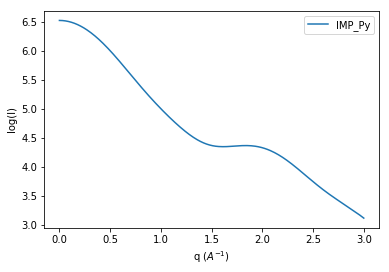

In [14]:
q_samples = np.linspace(min_q,max_q,divisions+1)
plt.plot(q_samples,np.log(I),label='IMP_Py')


plt.legend(loc='upper right')
plt.ylabel('log(I)')
plt.xlabel('q ($A^{-1}$)')

I = np.asarray(I)

print 'done'

plt.show()
